**Anomaly Detection & Time Series |
Assignment text**




1.  What is Anomaly Detection? Explain its types (point, contextual, and
collective anomalies) with examples.

    - Anomaly detection is the process of identifying unusual data points or patterns that deviate significantly from the expected behavior. These anomalies often signal fraud, system failures, or rare events. The three main types are point anomalies, contextual anomalies, and collective anomalies, each with distinct characteristics and examples.


- Point anomalies → single unusual values.
- Contextual anomalies → unusual in a given context.
- Collective anomalies → unusual group behavior.




2. Compare Isolation Forest, DBSCAN, and Local Outlier Factor in terms of
their approach and suitable use cases.


   -  Isolation Forest is tree-based and efficient for high-dimensional data, DBSCAN is density-based and excels at clustering with noise, while LOF is local-density based and detects subtle anomalies relative to neighbors.




3. What are the key components of a Time Series? Explain each with one
example.



    - there are 5 main componw ts of time series:

    level-the base value on which other components are added.



    trend-long term moment or direction this can be upward,downward or horizontal.


    season-frequent representation of data over a long period of time.



    cycle-the fluactuation in the data over a long period of time.



    noise-some uncertinity in time series because of unexpected reason.




4.  Define Stationary in time series. How can you test and transform a
non-stationary series into a stationary one?




     - Stationarity ensures reliable forecasting. You test it using ADF, KPSS, or PP tests, and transform non-stationary data using differencing, detrending, or variance-stabilizing transformations.




5.  Differentiate between AR, MA, ARIMA, SARIMA, and SARIMAX models in
terms of structure and application.




       - AR, MA, ARIMA, SARIMA, and SARIMAX are progressively more complex time series models. AR uses past values, MA uses past errors, ARIMA combines both with differencing for stationarity, SARIMA adds seasonal components, and SARIMAX further incorporates external explanatory variables.








         

In [ ]:
#6.  Load a time series dataset (e.g., AirPassengers), plot the original series, and decompose it into trend, seasonality, and residual components.



import pandas as pd

import datetime as dt

from statsmodels.tsa.seasonal import seasonal_decompose


import matplotlib.pyplot as plt
df=pd.read_csv("/content/AirPassengers (1).csv")

df['Month']=pd.to_datetime(df['Month'])

df.set_index('Month',inplace=True)



result = seasonal_decompose(df['#Passengers'], model='additive', period=12)

df['trend'] = result.trend
df['seasonal'] = result.seasonal
df['residual'] = result.resid

print(df.head(20))


            #Passengers       trend   seasonal   residual
Month                                                    
1949-01-01          112         NaN -24.748737        NaN
1949-02-01          118         NaN -36.188131        NaN
1949-03-01          132         NaN  -2.241162        NaN
1949-04-01          129         NaN  -8.036616        NaN
1949-05-01          121         NaN  -4.506313        NaN
1949-06-01          135         NaN  35.402778        NaN
1949-07-01          148  126.791667  63.830808 -42.622475
1949-08-01          148  127.250000  62.823232 -42.073232
1949-09-01          136  127.958333  16.520202  -8.478535
1949-10-01          119  128.583333 -20.642677  11.059343
1949-11-01          104  129.000000 -53.593434  28.593434
1949-12-01          118  129.750000 -28.619949  16.869949
1950-01-01          115  131.250000 -24.748737   8.498737
1950-02-01          126  133.083333 -36.188131  29.104798
1950-03-01          141  134.916667  -2.241162   8.324495
1950-04-01    

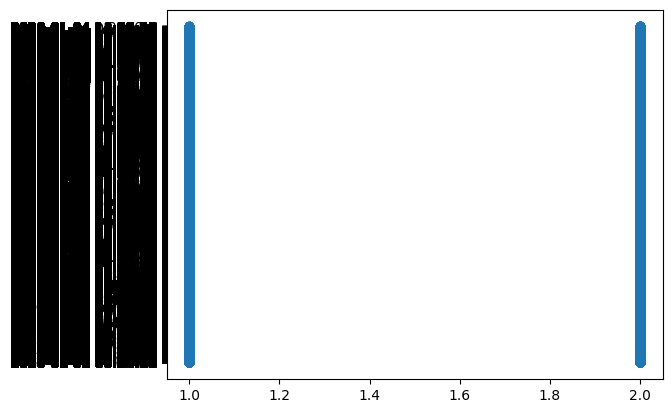

In [ ]:
#7. Apply Isolation Forest on a numerical dataset (e.g., NYC Taxi Fare) to detect anomalies. Visualize the anomalies on a 2D scatter plot.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest


data=pd.read_csv("/content/NYC_taxi_fare_data.csv")

plt.scatter(data.iloc[:,0],data.iloc[:,1])
plt.show()

In [40]:
#8.  Train a SARIMA model on the monthly airline passengers dataset. Forecast the next 12 months and visualize the results

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

df=pd.read_csv("/content/AirPassengers (1).csv")

df['Month']=pd.to_datetime(df['Month'])

df.set_index('Month',inplace=True)

model = SARIMAX(df['#Passengers'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit()


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [42]:
#9. Apply Local Outlier Factor (LOF) on any numerical dataset to detect anomalies and visualize them using matplotlib.

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

df=pd.read_csv("/content/AirPassengers (1).csv")
df['Month']=pd.to_datetime(df['Month'])

df.set_index('Month',inplace=True)

model=LocalOutlierFactor(n_neighbors=20)
model.fit_predict(df)

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1, -1, -1,  1,  1,  1,  1])

10. You are working as a data scientist for a power grid monitoring company.
Your goal is to forecast energy demand and also detect abnormal spikes or drops in
real-time consumption data collected every 15 minutes. The dataset includes features
like timestamp, region, weather conditions, and energy usage.
Explain your real-time data science workflow:
● How would you detect anomalies in this streaming data (Isolation Forest / LOF /
DBSCAN)?
● Which time series model would you use for short-term forecasting (ARIMA /
SARIMA / SARIMAX)?
● How would you validate and monitor the performance over time?
● How would this solution help business decisions or operations?







            - - solation Forest + LOF → anomaly detection.
- SARIMAX → short-term forecasting with weather/region features.
- Continuous monitoring → backtesting, error metrics, drift detection.
- Business value → reliability, cost optimization, and proactive decision-making.


